# Anotações sobre NetworkX

## Tipos de Grafos

- **Graph()**: Grafo não direcionado
- **DiGraph()**: Grafo direcionado
- **Grafo com pesos**: Adiciona atributo `weight` na função `add_edge()`
- **MultiGraph()**: Permite mais de uma aresta entre pares de nós

## Visualização

- Usar `nx.draw()` seguido de `plt.show()`
- Para visualizações mais avançadas: Plotly, Graphviz ou Gephi

## Métricas e Algoritmos

### Centralidade do Grau (Degree Centrality)

Mede a importância de um nó na rede através do número de arestas conectadas a ele, normalizado pelo maior grau possível. `degree_centrality()` computa a centralidade de todos os nós.

### Caminho Mais Curto (Shortest Path)

- `shortest_path()`: recebe obrigatoriamente `source` e `target`
- `shortest_path_length()`: calcula o tamanho do caminho mais curto

### Clustering Coefficient

Mede o quanto os vizinhos de um nó estão conectados entre si - o quão fechado é o grupo em torno do nó.

- **Alto clustering coefficient**: vizinhos se conectam entre si, formando uma comunidade local
- **Baixo clustering coefficient**: o nó é uma ponte entre grupos diferentes

**Cálculo**: Razão do número de triângulos de um nó pelo maior número de triângulos que poderia ser formado (triângulo = três nós todos interligados).

**Aplicação em redes textuais**: Em uma modelagem baseada em coocorrência de palavras, uma palavra com alto clustering coefficient significa que as palavras que aparecem com ela também tendem a aparecer juntas em outros contextos → possível indicador de mesma opinião.

### Community Detection

Processo de encontrar nós que estão mais densamente conectados entre si do que com o resto da rede.

- Métodos: Louvain Method ou Girvan-Newman Method
- `greedy_modularity_communities()` no NetworkX
- **Utilidade**: Identificação de polaridades

### Algoritmo de Dijkstra

Encontra o menor caminho entre nós em um grafo com pesos.

- `dijkstra_path()`: retorna o caminho
- `dijkstra_path_length()`: retorna o comprimento do caminho

### Árvore Geradora Mínima (Minimum Spanning Tree)

Subconjunto mínimo de arestas que conecta todos os nós sem ciclos e com o menor peso total.

**Aplicação**: Pode servir para identificar a estrutura essencial das relações entre palavras, "limpando" o grafo.

## Otimização

### Representação Esparsa (Sparse Matrix)

NetworkX armazena grafos internamente como dicionários de dicionários `{nó1: {nó2: {peso}}}`, o que não é eficiente para grafos grandes.

**Solução**: Usar `to_scipy_sparse_array()` para representação esparsa, que armazena apenas os pares de nós realmente conectados.

### Paralelização

- `connected_components_parallel()`: paraleliza a descoberta de grupos conectados
- `betweenness_centrality_parallel()`: paraleliza o cálculo da centralidade de cada nó
- **Biblioteca Dask**: útil para paralelização

### Profiling e Otimização

- **cProfile**: útil para otimização de grafos muito grandes
- **py-spy**: identifica gargalos no código e os otimiza

## Observações

BFS e DFS não foram incluídos por serem tópicos já bem conhecidos.

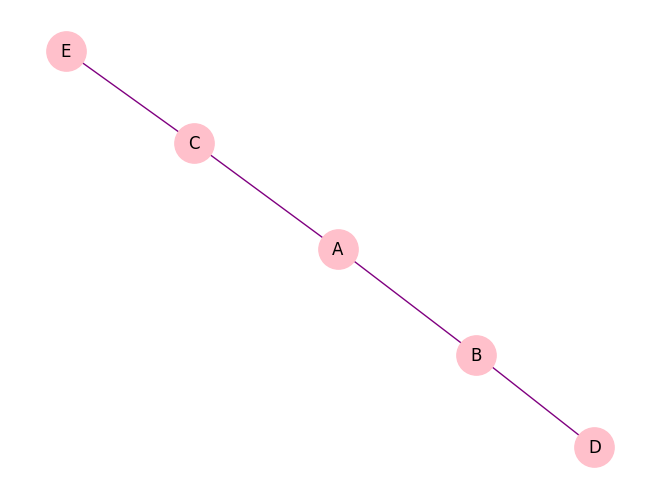

{'A': 0.5, 'B': 0.75, 'C': 0.75, 'D': 0.25, 'E': 0.25}


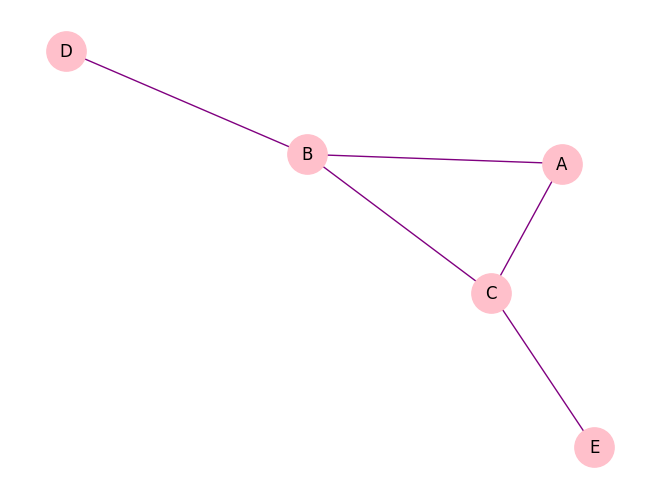

Caminho mais curto: ['D', 'B', 'C', 'E'], Tamanho: 3.
{'A': 1.0, 'B': 0.3333333333333333, 'C': 0.3333333333333333, 'D': 0, 'E': 0}


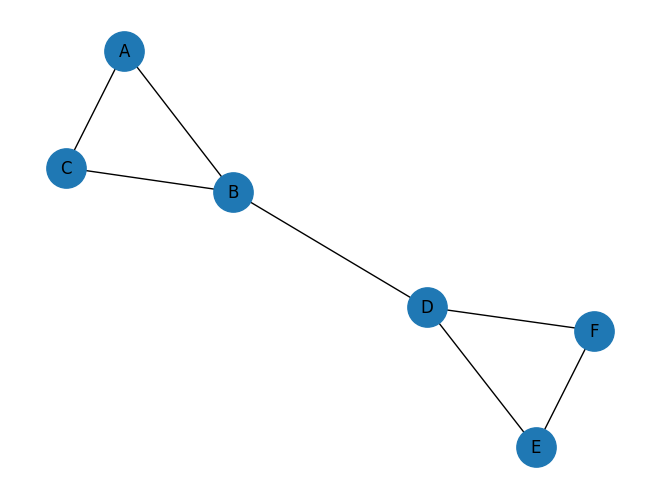

[frozenset({'B', 'A', 'C'}), frozenset({'F', 'E', 'D'})]


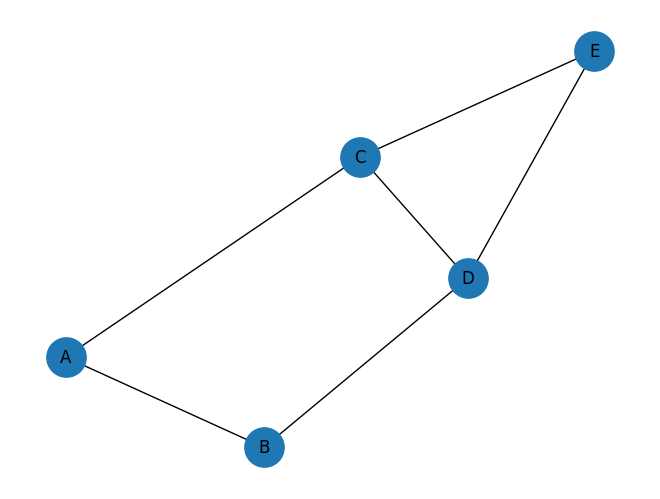

Menor caminho: ['A', 'C', 'E'], Tamanho: 3
[('música', 'clipe', {'weight': 3}), ('música', 'letra', {'weight': 8}), ('voz', 'emoção', {'weight': 4}), ('letra', 'emoção', {'weight': 6})]
<Compressed Sparse Row sparse array of dtype 'int64'
	with 6 stored elements and shape (5, 5)>
  Coords	Values
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (3, 4)	1
  (4, 3)	1


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import scipy.sparse

# Criando grafos
G = nx.Graph()  # grafo não direcionado
G.add_node("A")
G.add_node("B")
G.add_edge("A", "B")
G.add_nodes_from(["C", "D", "E"])
G.add_edges_from([("A","C"), ("B","D"), ("C","E")])

DG = nx.DiGraph()  # grafo direcionado
DG.add_nodes_from(["W", "X", "Y", "Z"])
DG.add_edges_from([("W","Z"), ("X","Y"), ("Z","Y")])

WG = nx.Graph()  # grafo com pesos
WG.add_nodes_from(["C", "D", "E"])
WG.add_edge("C", "D", weight=3)
WG.add_edge("C", "E", weight=4)
WG.add_edge("D", "E", weight=5)

MG = nx.MultiGraph()  # multigrafo
MG.add_nodes_from(["W", "X", "Y", "Z"])
MG.add_edges_from([("W","Z"), ("W","Z"), ("X","Y")])

# Visualizando
nx.draw(G, node_size=800, with_labels=True, node_color="pink", edge_color="purple")
plt.show()

# Centralidade do grau
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "C"), ("B", "D")])
degree_centrality = nx.degree_centrality(G)
print(degree_centrality)
nx.draw(G, node_size=800, with_labels=True, node_color="pink", edge_color="purple")
plt.show()

# Caminho mais curto
caminho = nx.shortest_path(G, source="D", target="E")
tamanho = nx.shortest_path_length(G, source="D", target="E")
print(f"Caminho mais curto: {caminho}, Tamanho: {tamanho}.")

# Clustering coefficient
clustering_coefficient = nx.clustering(G)
print(clustering_coefficient)

# Community detection
GC = nx.Graph()
GC.add_edges_from([("A", "B"), ("A", "C"), ("B", "C"), ("B", "D"), ("D", "E"), ("D", "F"), ("E", "F")])
communities = list(community.greedy_modularity_communities(GC))
nx.draw(GC, node_size=800, with_labels=True)
plt.show()
print(communities)

# Dijkstra
DJ = nx.Graph()
DJ.add_edge("A", "B", weight=3)
DJ.add_edge("A", "C", weight=1)
DJ.add_edge("B", "D", weight=2)
DJ.add_edge("C", "D", weight=4)
DJ.add_edge("C", "E", weight=2)
DJ.add_edge("D", "E", weight=1)
nx.draw(DJ, node_size=800, with_labels=True)
plt.show()
path = nx.dijkstra_path(DJ, source="A", target="E")
length = nx.dijkstra_path_length(DJ, source="A", target="E")
print(f"Menor caminho: {path}, Tamanho: {length}")

# Árvore geradora mínima (Minimum Spanning Tree)
MST = nx.Graph()
MST.add_weighted_edges_from([
    ('música', 'voz', 10),
    ('música', 'letra', 8),
    ('letra', 'emoção', 6),
    ('voz', 'emoção', 4),
    ('música', 'clipe', 3),
])
mst = nx.minimum_spanning_tree(MST)
print(mst.edges(data=True))

# Otimização
SP = nx.Graph()
SP.add_edges_from([(0, 1), (1, 2), (3, 4)])
sparse_matrix = nx.to_scipy_sparse_array(SP)
print(sparse_matrix)